In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder,PowerTransformer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer,MinMaxScaler
from sklearn.compose import ColumnTransformer
from scipy import stats
from xgboost import XGBRFClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
import math
import seaborn as sns

In [4]:
data = pd.read_csv('train_bean.csv')

In [176]:
fulldata = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [254]:
# show first 5 rows
fulldata.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [439]:
# inspect data statistics(mean,std,min,... )
data.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [11]:
# display the classes distribution
data["y"].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

<AxesSubplot:>

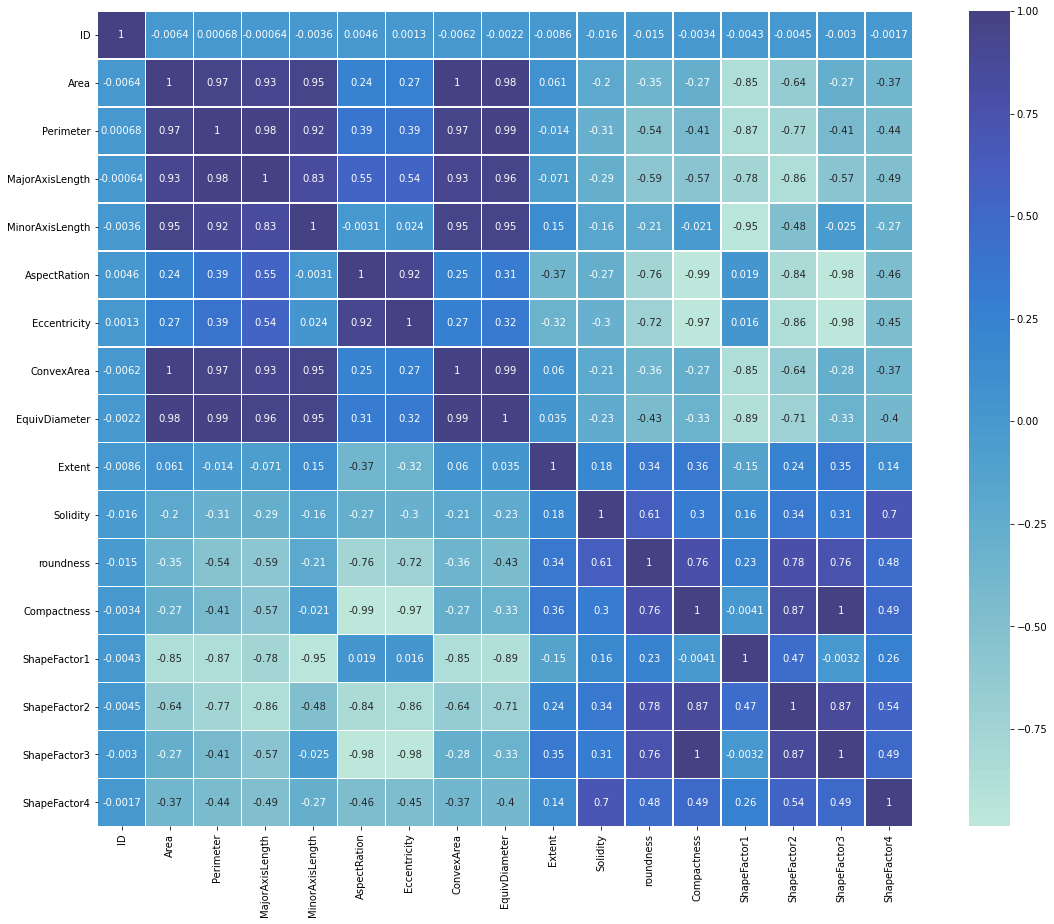

In [9]:
corr = data.corr()
fig , ax =  plt.subplots(1,1,figsize = (20,15))
sns.heatmap(corr,square=True, annot = True, linewidth = .5, center = 2, ax = ax,cbar=True)

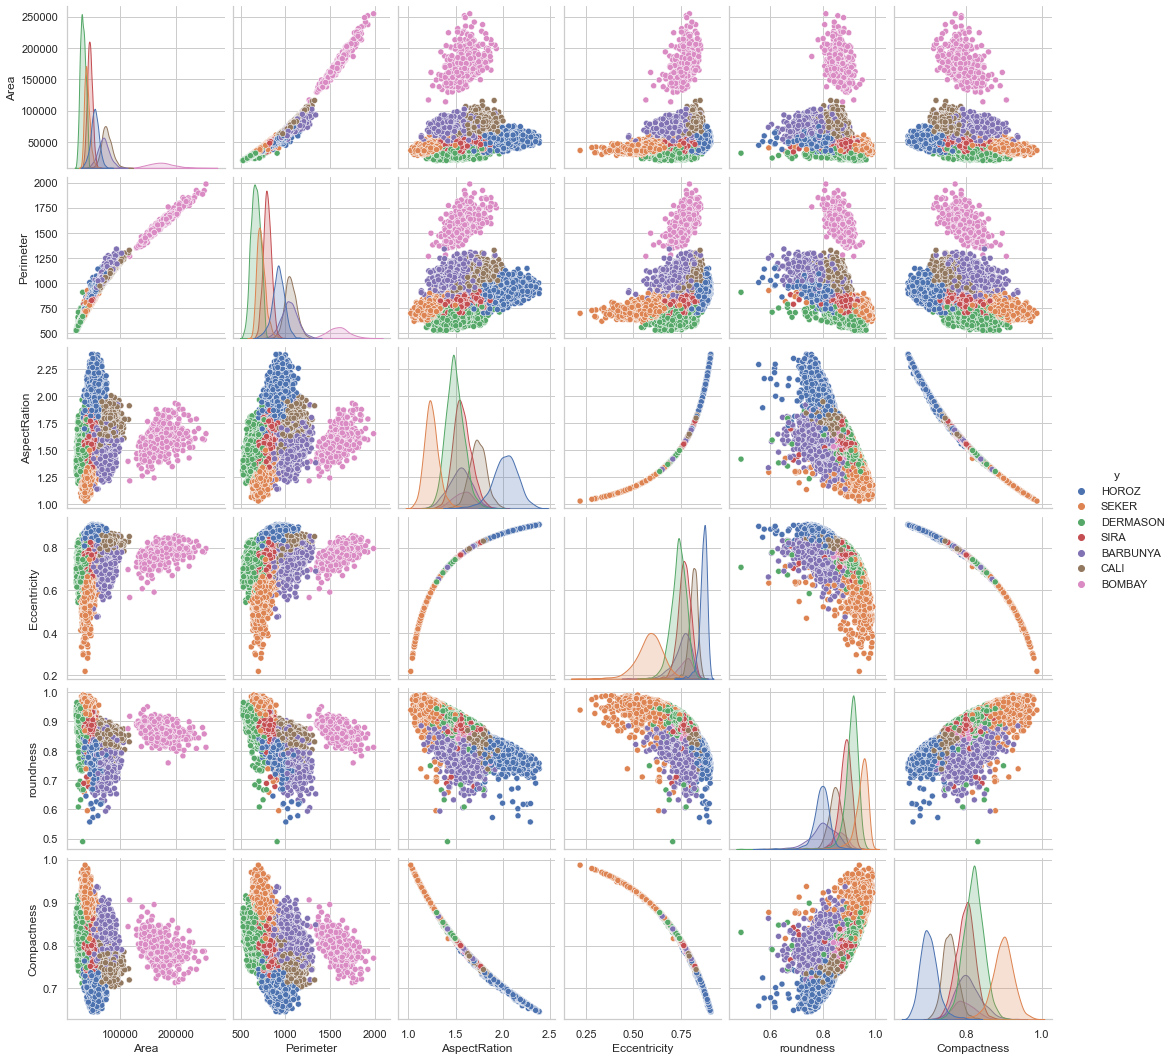

In [10]:
# use pair plot to show relation between the data 
Strongly_corr_features = data[["Area","Perimeter","AspectRation","Eccentricity","roundness","Compactness","y"]]
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="y")

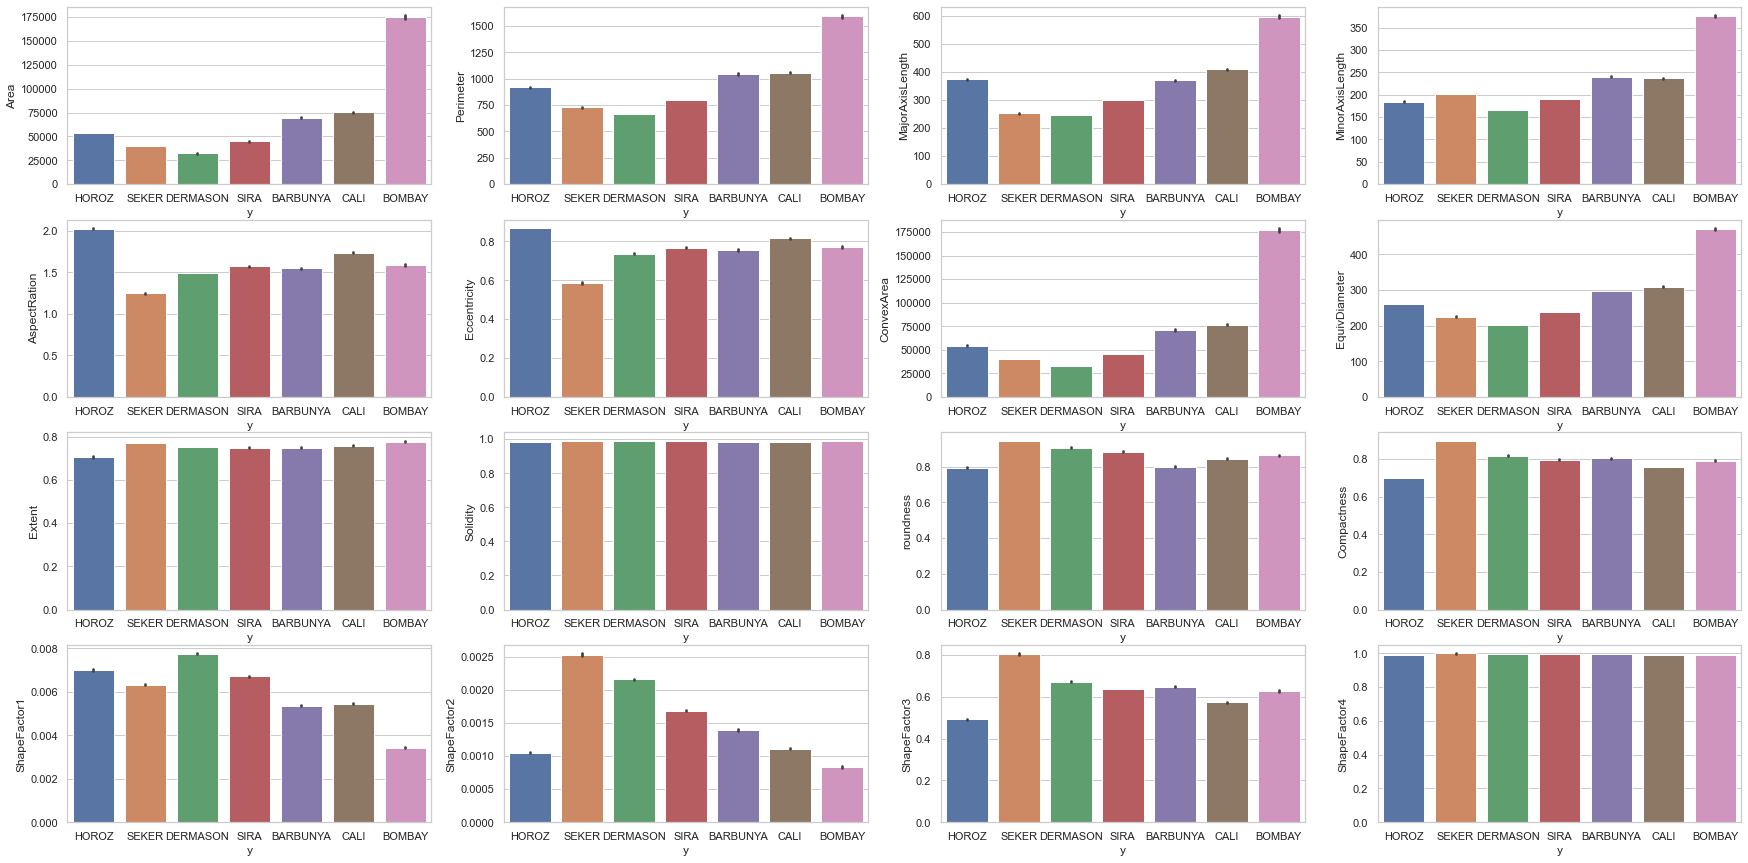

In [34]:
# draw Categorical estimate of featuure to show count distribution
cols = list(data.columns)
cols.remove('y')
cols.remove('ID')

grid_row = int(len(cols)/4)
grid_col = 4

fig , axes =  plt.subplots(grid_row,grid_col,figsize=(30,15))
for i in range(grid_row):
    for j in range(grid_col):
        sns.barplot(y=cols[i*grid_col + j ],x='y',ax=axes[i][j],data=data)
plt.show()

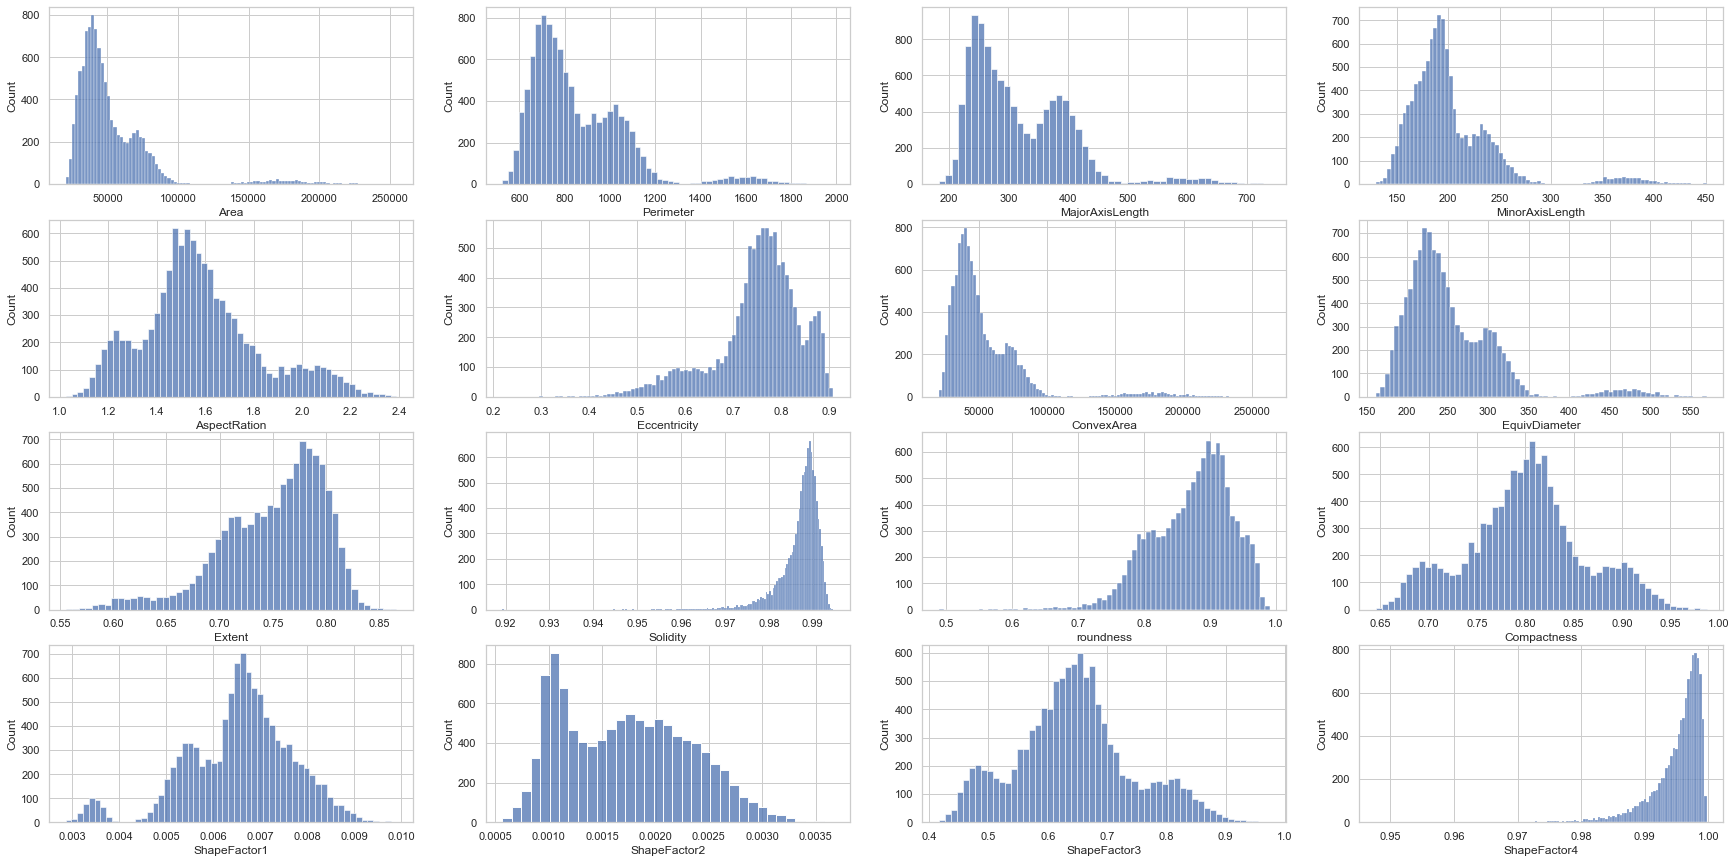

In [36]:
# draw histogram of data to show skewness

fig , axes =  plt.subplots(grid_row,grid_col,figsize=(30,15))
for i in range(grid_row):
    for j in range(grid_col):
        sns.histplot(x=cols[i*grid_col + j ],ax=axes[i][j],data=data)
plt.show()

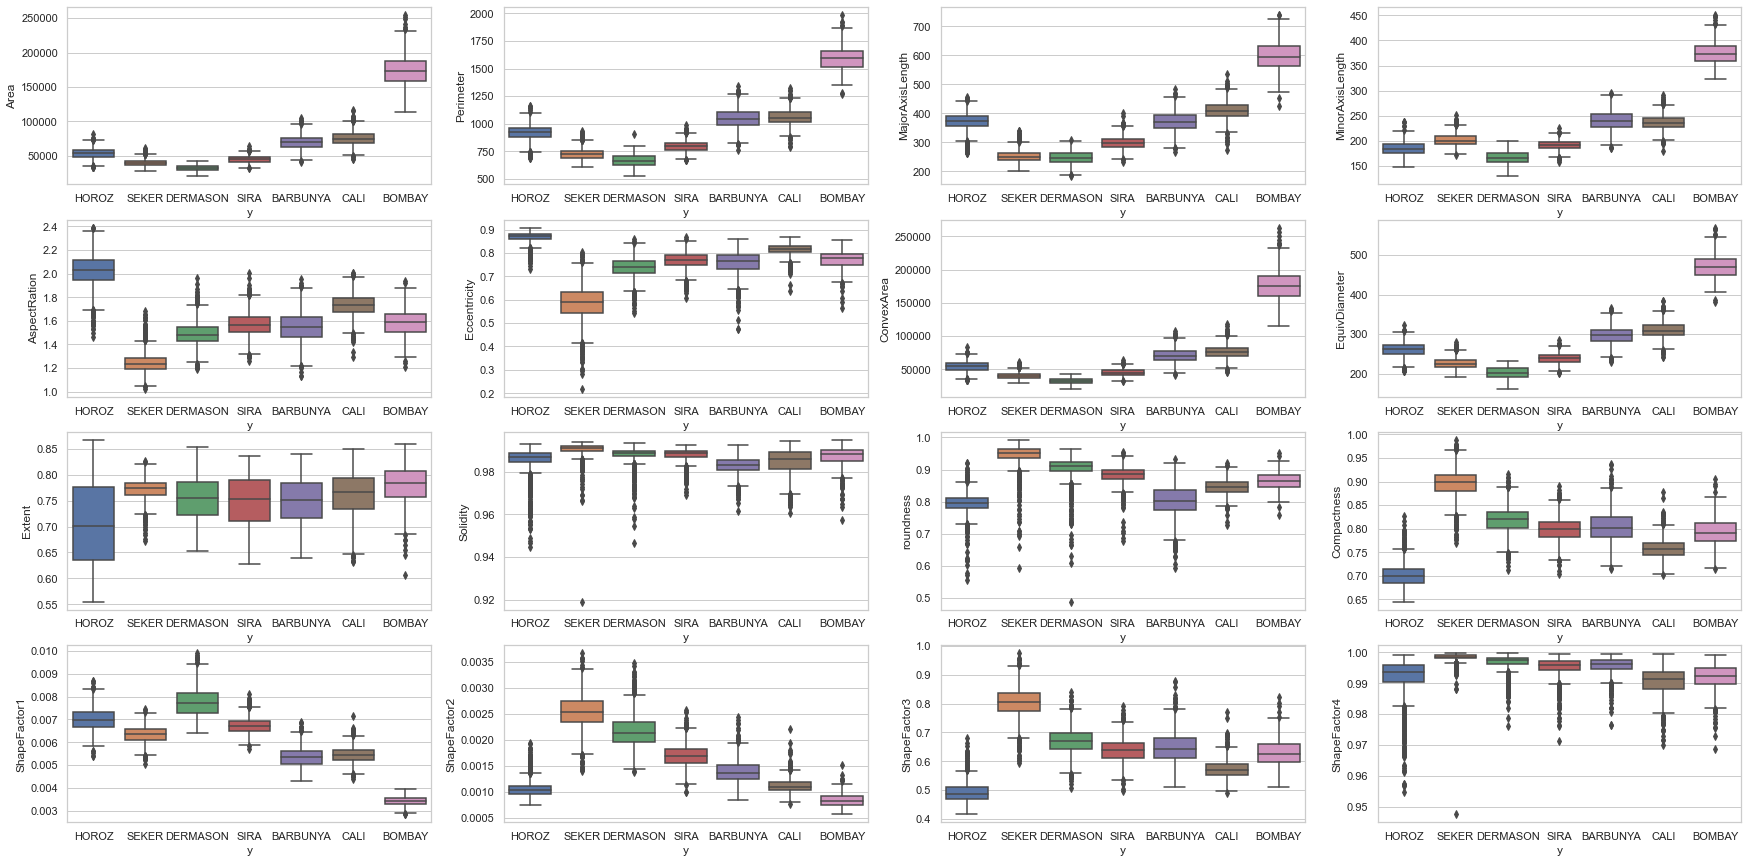

In [38]:
fig , axes =  plt.subplots(grid_row,grid_col,figsize=(30,15))
for i in range(grid_row):
    for j in range(grid_col):
        sns.boxplot(y=cols[i*grid_col + j ],x='y',ax=axes[i][j],data=data)
plt.show()


conculsions from above charts:
1- many features has skewness right or left like area, preimeiter, ecentrecity
2- many features has outliers which need to be handled using mean or average
3- there is strong correlation between features beacuse features are calculated from each other
4- Sira and BARBUNYA overlap in many features

In [22]:
from sklearn.preprocessing import QuantileTransformer
# pw = QuantileTransformer(output_distribution= 'normal')
ind_cols = ['Eccentricity','Perimeter','ShapeFactor3','ShapeFactor1','roundness','MinorAxisLength','Solidity']
df = data[ind_cols].copy()


In [ ]:
#use log transformation to handle skewness in the features
for col in data.drop(['y','ID'], axis=1).columns:
    data[col] = np.log(data[col]+1)

In [41]:
# do feature engineering to extract new features 
ord_Trans = OrdinalEncoder()
data['t'] = math.pi*(3*(data["MajorAxisLength"] + data["MinorAxisLength"]) - np.sqrt((3* data["MajorAxisLength"] + data["MinorAxisLength"])\
*(data["MajorAxisLength"] + 3*data["MinorAxisLength"]))) / data['Perimeter']
data['rc'] = data["Area"]*data['Extent']/data['ConvexArea'] 
data['mir'] = data["Area"]/(math.pi*np.square(data['MinorAxisLength']))
data['mr'] = data["Area"]/(math.pi*np.square(data['MajorAxisLength']))


data["y"] = ord_Trans.fit_transform(data[["y"]])


In [63]:
x_train, x_valid, y_train, y_valid = train_test_split(data.drop(['ID','y'],axis=1) ,data[['y']], test_size=0.3, random_state=0)


In [64]:
# standarize data to have the same scale .. mean 0 and 1 std 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

                            

In [65]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

#use linear Discriminant Analysis to reduce the dimension 
x_train = lda.transform(x_train)
x_valid = lda.transform(x_valid)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [ ]:
# Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira bean varieties with 92.36%, 100.00%, 95.03%, 94.36%, 94.92%, 94.67% and 86.84%, 

In [58]:
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import svm
from sklearn.svm import SVC
# use cross validation to tune hyper paramters
lcv = make_pipeline(SVC(class_weight='balanced'))
parm =  {
            'svc__C': np.logspace(-2, 7, 10),
            'svc__kernel':['poly','rbf'],
            'svc__degree':[3,4],
            'svc__decision_function_shape':['ovo','ovr']
        }
cv_lc = GridSearchCV(estimator=lcv, param_grid=parm)
with ignore_warnings(category=ConvergenceWarning):
    cv_lc.fit(x_train,y_train['y'])


In [66]:
svc_model = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
svc_model.fit(x_train,y_train['y'])

SVC(decision_function_shape='ovo', gamma=0.2, random_state=42)

In [67]:
print("validation accuracy",svc_model.score(x_valid,y_valid))

validation accuracy 0.9227929867733006


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print(classification_report(y_valid,svc_model.predict(x_valid) ))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       326
         1.0       0.99      1.00      1.00       123
         2.0       0.92      0.95      0.93       387
         3.0       0.93      0.91      0.92       880
         4.0       0.97      0.95      0.96       438
         5.0       0.94      0.94      0.94       492
         6.0       0.84      0.90      0.87       605

    accuracy                           0.92      3251
   macro avg       0.94      0.93      0.93      3251
weighted avg       0.92      0.92      0.92      3251

